### 최종 실습 프로젝트
- ecommerce_sales_data.csv 파일 활용

당신은 한 온라인 쇼핑몰의 데이터 분석가로 고용되었다. 쇼핑몰의 판매 데이터를 분석하여 고객의 구매 패턴을 파악하고, 중요한 인사이트를 도출하는 것이 이번 프로젝트의 목표다. 이를 통해 향후 마케팅 전략을 제시하고자 한다. ecommerce_sales_data.csv 파일을 통해 주어진 데이터는 고객의 주문 기록, 상품 정보, 판매 데이터 등을 포함하고 있다. 주어진 데이터를 분석하여 아래의 질문에 답하라.

- **데이터 설명**:
    - **OrderID**: 주문 ID
    - **Product**: 주문한 상품 이름
    - **Category**: 상품의 카테고리 (예: Electronics, Clothing 등)
    - **Quantity**: 주문 수량
    - **Price**: 상품의 가격
    - **CustomerID**: 고객 ID
    - **BirthDate**: 고객 생일
    - **OrderDate**: 주문 날짜
    - **Country**: 주문한 고객의 국가
    - **DiscountRate**: 할인율

1. **데이터 탐색 및 전처리**
    1. 데이터셋을 로드하고 상위 5개의 데이터를 출력하세요.
    2. 결측값이 있는 열이 있는지 확인하고, 결측값이 있는 경우 적절한 방법으로 처리하세요.
    3. 각 열의 데이터 타입을 확인하고, **OrderDate** 열을 datetime 형식으로 변환하세요.

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 한글 폰트 사용을 위한 설정
import matplotlib.font_manager as fm
import matplotlib

font_path = 'C:/Windows/Fonts/HMFMPYUN.ttf'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font',family=font)

In [84]:
# dataset 로드 & 상위 5개 출력 _ default 5개
data = pd.read_csv('./data/ecommerce_sales_data.csv')
df = pd.DataFrame(data)
print(df.head())

# 결측값이 있는 열 확인 & 평균으로 채우기
print(df.info())
df['DiscountRate'] = df['DiscountRate'].fillna(df['DiscountRate'].mean())

# 각 열의 데이터 타입 확인 & OrderDate 변환

df['OrderDate'] = pd.to_datetime(df['OrderDate'])

   OrderID Product     Category  Quantity  Price  CustomerID   Birthdate  \
0        1     역사책        Books         5  37000        1071  1980-08-08   
1        2      셔츠     Clothing         5  20000        1526  1967-08-09   
2        3     노트북  Electronics         4   8000        1252  1973-04-07   
3        4     자전거       Sports         1   8000        1670  1970-04-08   
4        5     헤드폰  Electronics         3  26000        1838  1992-05-19   

          OrderDate Country  DiscountRate  
0  2024-06-10 17:18      미국          0.14  
1  2023-11-18 18:45      독일          0.29  
2  2023-10-15 11:19      중국          0.23  
3   2024-07-19 2:19      일본          0.20  
4  2024-01-20 20:34    대한민국          0.09  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OrderID       120 non-null    int64  
 1   Product       120 non-null    object 
 2

2. **매출 분석**
    1. **매출액**(총 판매 금액)을 계산하는 새로운 열 `TotalRevenue`를 생성하세요.
        - 매출액 = `Quantity` * `Price`
    2. 월별 총 매출액을 집계하여 시각화하세요.
        - 힌트: `resample()`을 사용하여 월별로 데이터를 집계하세요.
    3. 카테고리별로 매출액이 가장 높은 상위 3개의 카테고리를 구하세요.
    4. 국가별 총 매출액을 계산하고, 매출액이 가장 높은 5개 국가를 출력하세요.

C:\Users\brain\AppData\Local\Temp\ipykernel_24964\3458036532.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sum = df.resample('M').sum()['Price']


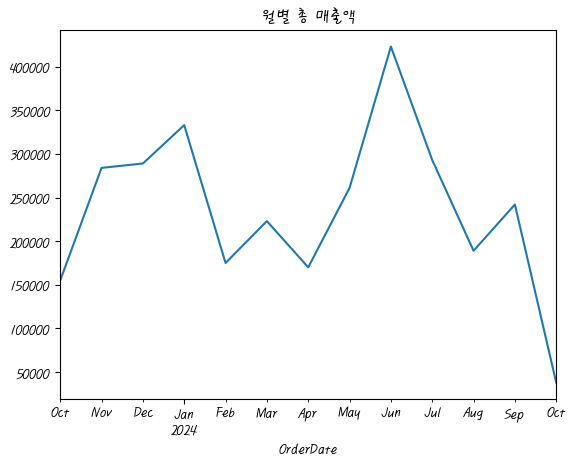

Index(['Beauty', 'Books', 'Clothing'], dtype='object', name='Category')


In [86]:
# TotalRevenue 생성
df['TotalRevenue'] = df['Quantity']*df['Price']

# 월별 총 매출액
df.set_index('OrderDate',inplace=True)
monthly_sum = df.resample('M').sum()['Price']
monthly_sum.plot(title='월별 총 매출액')
plt.show()

# 카테고리별 매출액이 가장 높은 상위 3개의 카테고리 구하기

print(df.groupby('Category')['Price'].sum().head(3).index)

3. **고객 분석**
    1. 고객별로 총 매출액을 계산한 후, 상위 5명의 고객을 출력하세요.
    2. 주문 횟수가 가장 많은 상위 5명의 고객을 출력하세요.
    3. **연령대**에 따라 고객을 분류하고, 각 연령대별로 가장 많이 구매한 상품의 카테고리를 구하세요.
        - 힌트: 고객의 연령대는 따로 제공되지 않으므로, 가정 데이터를 추가해 임의로 분류할 수 있습니다.

In [ ]:
# 총 매출액 계산한 후, 상위 5명의 고객 출력
print(df.groupby('CustomerID')['Price'].sum())
print(df.groupby('CustomerID')['Price'].sum().sort_values(ascending=False).head(5).index)

# 주문횟수가 많은 상위 5명
print(df.groupby('CustomerID').count().head(5).index)

# 연령대에 따라 고객분류


CustomerID
1007    80000
1029    33000
1034    49000
1038    79000
1039    46000
        ...  
1947    34000
1951    48000
1963    33000
1967    25000
1982    50000
Name: Price, Length: 111, dtype: int64
Index([1496, 1007, 1038, 1141, 1508], dtype='int64', name='CustomerID')
Index([1007, 1029, 1034, 1038, 1039], dtype='int64', name='CustomerID')


4. **상품 분석**
    1. 가장 많이 판매된 상위 5개의 상품을 출력하세요.
    2. **카테고리별**로 가장 많이 판매된 상품을 찾아 출력하세요.
    3. **평균 구매 수량**이 가장 높은 상위 3개의 상품을 출력하세요.

In [108]:
# 가장 많이 판매된 상위 5개의 상품 출력
print(df.groupby('Product').count().head().index)

# 카테고리별 가장 많이 판매된 상품 찾아 출력
print(df.groupby(['Category','Product']).count())

Index(['과자', '과학책', '노트북', '라면', '로션'], dtype='object', name='Product')
                     OrderID  Quantity  Price  CustomerID  Birthdate  Country  \
Category    Product                                                             
Beauty      로션             2         2      2           2          2        2   
            립스틱            7         7      7           7          7        7   
            샴푸             3         3      3           3          3        3   
            향수             5         5      5           5          5        5   
            화장품            6         6      6           6          6        6   
Books       과학책            5         5      5           5          5        5   
            비즈니스           2         2      2           2          2        2   
            소설             7         7      7           7          7        7   
            역사책            7         7      7           7          7        7   
            자기계발           1         

5. **시간 분석**
    1. 주문 날짜별로 **주별** 매출액을 계산하고 시각화하세요.
    2. 특정 기간(예: 2024년 1월 ~ 2024년 6월) 동안의 매출 추이를 분석하고 시각화하세요.
    3. 특정 국가에서 가장 많이 주문한 시간대를 분석하고, 이를 시각화하여 인사이트를 도출하세요.

6. **추가 분석**
    1. 고객의 **재구매율**을 분석하세요.
        - 재구매율 = 한 고객이 여러 번 주문한 비율
    2. 상품 카테고리별 **할인**을 적용한 판매 데이터를 사용하여 할인율이 높은 카테고리의 매출액을 분석하세요.